In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()



'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx


/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine8

In [4]:
n = 500
d = 3
tau = 2.1
alpha = 1.2
desiredAvgDegree = 100.0

b = 1.9
pp = points.get_points_distorted(np.array([1.0, 0.6, 0.3]), cube=True)

# This const was generated for the power law distribution
g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,points_type=pp)

const_in: 34.00889046107706


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)


array([[ 1.        , -0.97652741],
       [-0.97652741,  1.        ]])

array([[ 1.        , -0.84427655],
       [-0.84427655,  1.        ]])

array([[1.        , 0.04828667],
       [0.04828667, 1.        ]])

array([[ 1.        , -0.98482959],
       [-0.98482959,  1.        ]])

array([[ 1.        , -0.89925974],
       [-0.89925974,  1.        ]])

array([[1.        , 0.05451501],
       [0.05451501, 1.        ]])

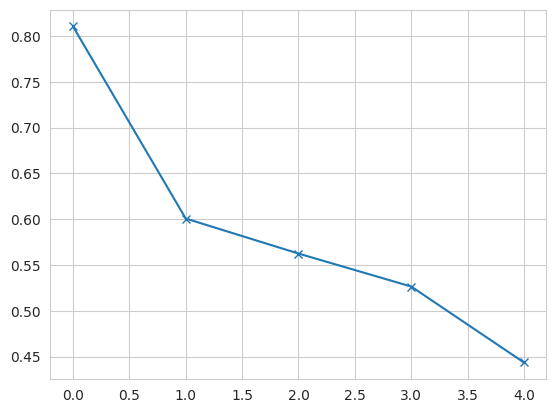

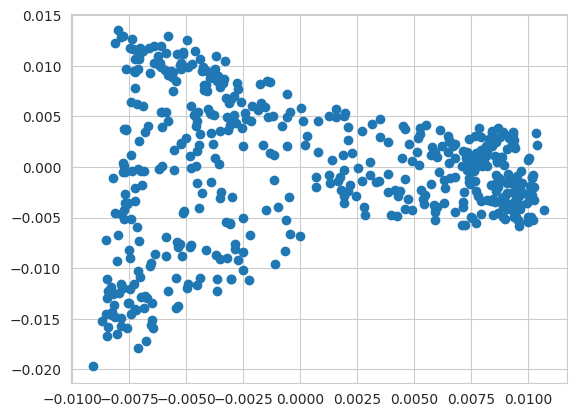

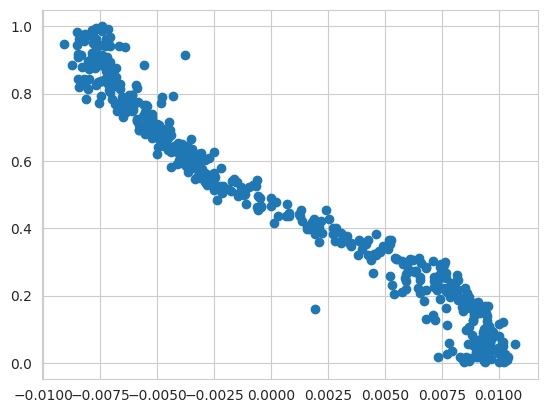

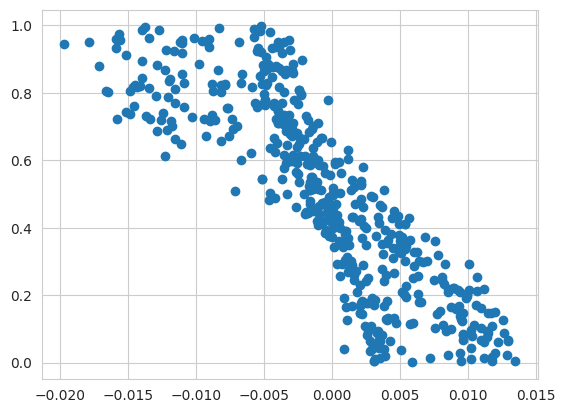

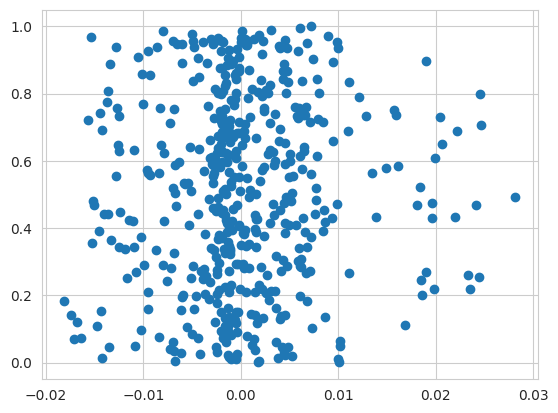

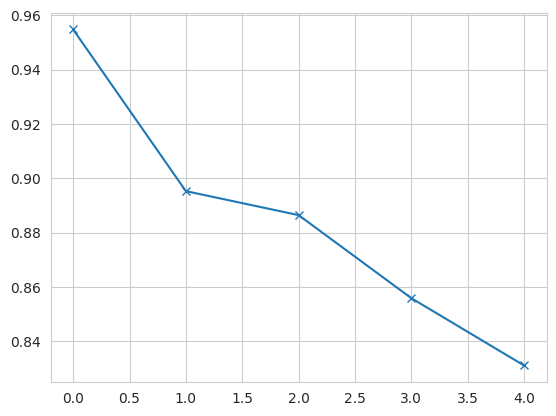

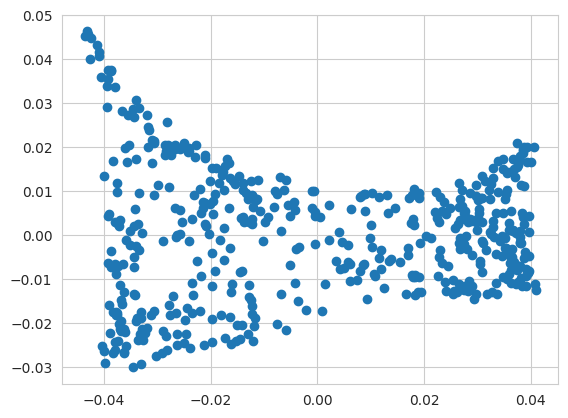

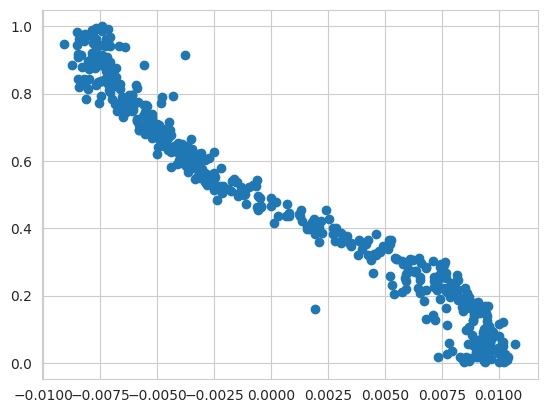

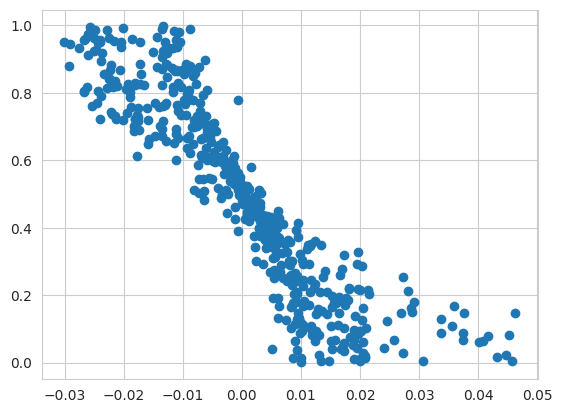

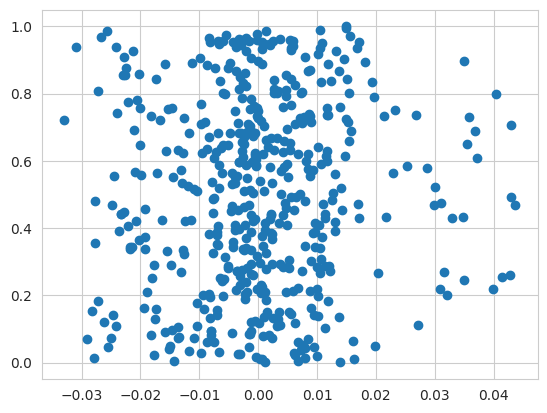

In [8]:
gnx = nk.nxadapter.nk2nx(g)

# A = nx.linalg.adjacency_matrix(gnx).todense()
A = nx.linalg.adjacency_matrix(gnx)

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

n = A.shape[0]

# M_ij = W_ij / d_i
M = np.diag(1/D) @ A

Iweighting=0.5
# M = (1-Iweighting)* M + Iweighting * np.eye(M.shape[0])

S = np.diag(D_h) @ M @ np.diag(D_hi)
w, V = np.linalg.eigh(S)

Phi = np.diag(D_hi) @ V
Psi = np.diag(D_h) @ V

def diff_map(i, t):
    return Phi[i, -2::-1] * w[-1:]**t

_ = plt.figure()
plt.plot(w[-2:-7:-1], marker='x')

_ = plt.figure()
pts_diffmap = np.array([diff_map(i, 10) for i in range(n)])
_ = plt.scatter(pts_diffmap[:, 0], pts_diffmap[:, 1])

_ = plt.figure()
_ = plt.scatter(pts_diffmap[:, 0], pts[:, 0])

_ = plt.figure()
plt.scatter(pts_diffmap[:, 1], pts[:, 1])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 2], pts[:, 2])

np.corrcoef(pts_diffmap[:, 0], pts[:, 0])
np.corrcoef(pts_diffmap[:, 1], pts[:, 1])
np.corrcoef(pts_diffmap[:, 2], pts[:, 2])

gamma = 0.9
M_tilde = np.diag(1/D) @ A @ np.diag(D**(-gamma))
M_tilde = np.diag(1/M_tilde.sum(axis=-1)) @ M_tilde
M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
a, B = np.linalg.eig(M_tilde)
B_inv = np.linalg.inv(B)

def diff_map2(i, t):
    return B[i, 1:] * a[1:]**t

_ = plt.figure()
plt.plot(a[1:6], marker='x')


_ = plt.figure()
pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
_ = plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])

_ = plt.figure()
_ = plt.scatter(pts_diffmap[:, 0], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap2[:, 1], pts[:, 1])
_ = plt.figure()
plt.scatter(pts_diffmap2[:, 2], pts[:, 2])

np.corrcoef(pts_diffmap2[:, 0], pts[:, 0])
np.corrcoef(pts_diffmap2[:, 1], pts[:, 1])
np.corrcoef(pts_diffmap2[:, 2], pts[:, 2])

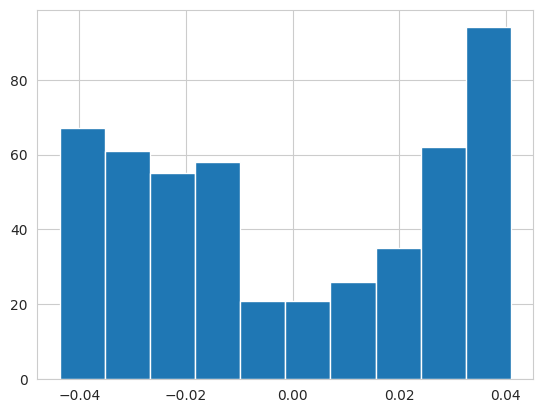

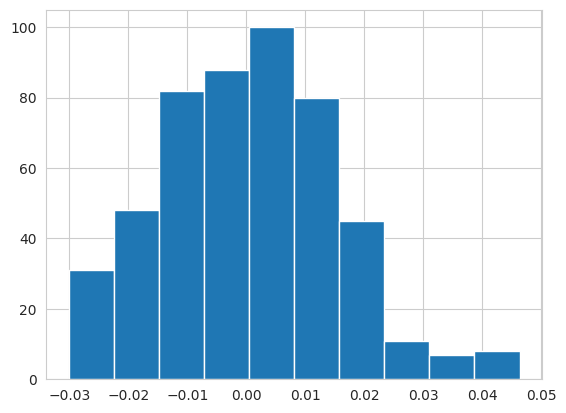

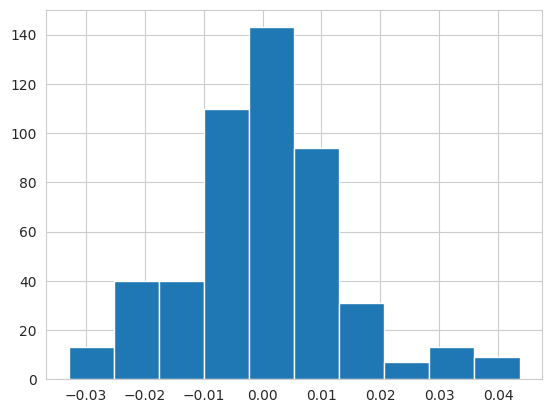

In [10]:
for i in range(3):
    _ = plt.figure()
    _ = plt.hist(pts_diffmap2[:, i])

array([[ 1.        , -0.07859664],
       [-0.07859664,  1.        ]])

array([[1.        , 0.03802925],
       [0.03802925, 1.        ]])

array([[1.        , 0.79527583],
       [0.79527583, 1.        ]])

array([[ 1.        , -0.02520212],
       [-0.02520212,  1.        ]])

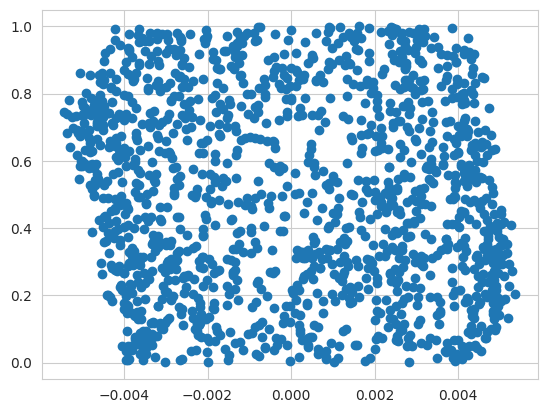

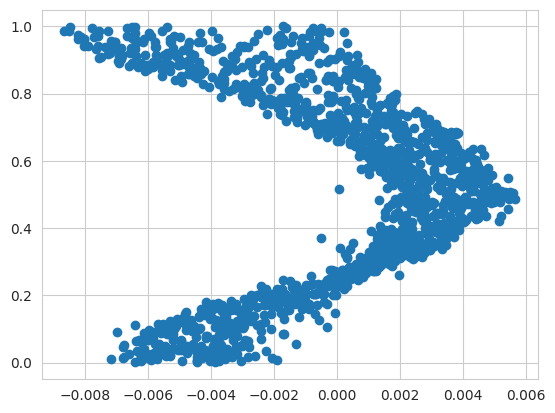

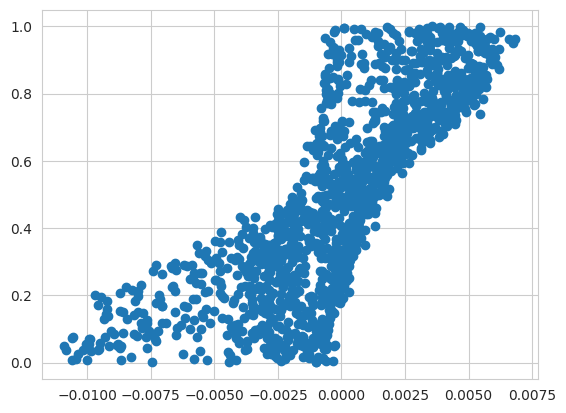

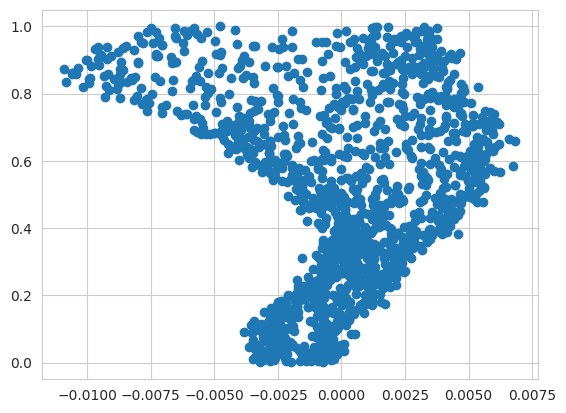

In [85]:
_ = plt.figure()
plt.scatter(pts_diffmap[:, 0], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 1], pts[:, 1])

np.corrcoef(pts_diffmap[:, 0], pts[:, 0])
np.corrcoef(pts_diffmap[:, 1], pts[:, 1])

_ = plt.figure()
plt.scatter(pts_diffmap[:, 2], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 2], pts[:, 1])

np.corrcoef(pts_diffmap[:, 2], pts[:, 0])
np.corrcoef(pts_diffmap[:, 2], pts[:, 1])

(array([16., 21., 26., 57., 94., 89., 92., 53., 40., 12.]),
 array([-0.01592703, -0.01296302, -0.00999902, -0.00703502, -0.00407101,
        -0.00110701,  0.00185699,  0.004821  ,  0.007785  ,  0.010749  ,
         0.01371301]),
 <BarContainer object of 10 artists>)

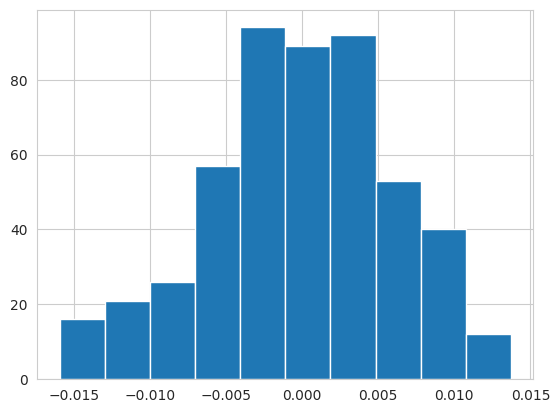

In [54]:
plt.hist(pts_diffmap[:, 1])

(array([15., 21., 33., 82., 69., 77., 87., 71., 36.,  9.]),
 array([-0.00391815, -0.00318555, -0.00245295, -0.00172035, -0.00098776,
        -0.00025516,  0.00047744,  0.00121004,  0.00194263,  0.00267523,
         0.00340783]),
 <BarContainer object of 10 artists>)

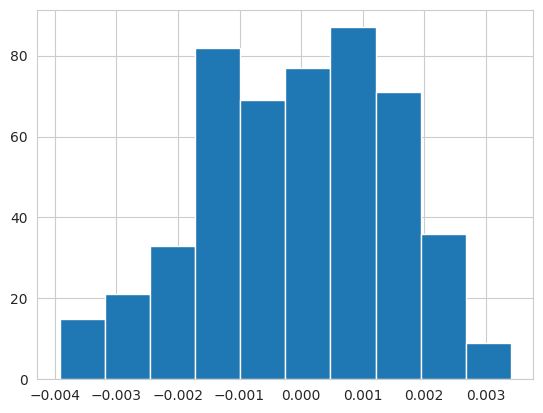

In [55]:
plt.hist(pts_diffmap2[:, 1])

(array([15., 85., 61., 54., 41., 33., 37., 55., 79., 40.]),
 array([-0.00979085, -0.00779603, -0.0058012 , -0.00380638, -0.00181155,
         0.00018327,  0.00217809,  0.00417292,  0.00616774,  0.00816257,
         0.01015739]),
 <BarContainer object of 10 artists>)

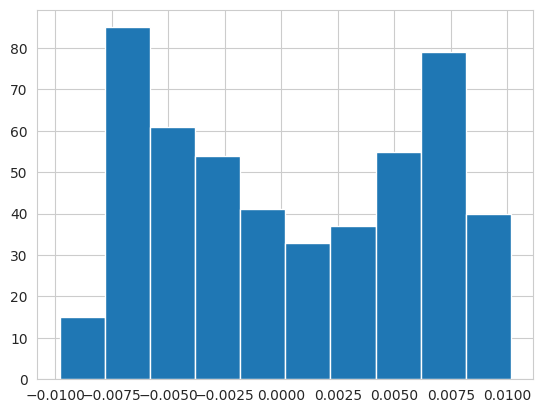

In [57]:
plt.hist(pts_diffmap[:, 0])

In [95]:
np.linspace(-1.4, 1.4, 29)

array([-1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
       -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,
        0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4])

In [11]:
gamma=0.9

for Iweighting in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    M_tilde = np.diag(1/D) @ A @ np.diag(D**(-gamma))
    M_tilde = np.diag(1/M_tilde.sum(axis=-1)) @ M_tilde
    M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
    a, B = np.linalg.eig(M_tilde)
    B_inv = np.linalg.inv(B)

    def diff_map2(i, t):
        return B[i, 1:] * a[1:]**t

    pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])

    print(f'Iweighting={Iweighting}')
    print(a[1:6])
    np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])[0, 1]
    np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])[0, 1]

    # _ = plt.figure()
    # plt.plot(a[1:6], marker='x')
    #
    #
    # _ = plt.figure()
    # pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
    # _ = plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])
    #
    # _ = plt.figure()
    # plt.scatter(pts_diffmap2[:, 0], pts[:, 1])
    # _ = plt.figure()
    # plt.scatter(pts_diffmap2[:, 1], pts[:, 0])
    #
    # np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])
    # np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])

Iweighting=0.1
[0.91863675 0.81153885 0.79564243 0.74061798 0.69602718]


0.028123945558457156

0.006466173762155812

Iweighting=0.2
[0.92767711 0.83247898 0.81834883 0.7694382  0.72980193]


0.028123945558453694

-0.0064661737621526045

Iweighting=0.3
[0.93671747 0.8534191  0.84105522 0.79825843 0.76357669]


-0.028123945558453954

-0.006466173762150539

Iweighting=0.4
[0.94575783 0.87435923 0.86376162 0.82707865 0.79735145]


-0.02812394555845795

0.006466173762151995

Iweighting=0.5
[0.95479819 0.89529936 0.88646802 0.85589888 0.83112621]


0.02812394555844987

-0.0064661737621429525

Iweighting=0.6
[0.96383856 0.91623949 0.90917441 0.8847191  0.86490097]


-0.02812394555845037

0.006466173762140938

Iweighting=0.7
[0.97287892 0.93717962 0.93188081 0.91353933 0.89867573]


0.02812394555846952

-0.006466173762159999

In [102]:
a

array([1.        , 0.96973156, 0.93329019, ..., 0.49787697, 0.49908097,
       0.49877778])

In [91]:
import os
os.getcwd()
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [93]:
df.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,756,"{'tau': 7.3017225936374555, 'alpha': 1.2171928..."
1,socfb-Reed98,1d-copyweight-cube-girg,955,"{'tau': 4.381732472502371, 'alpha': 1.07671601..."
2,socfb-Caltech36,2d-copyweight-cube-girg,757,"{'tau': 7.3017225936374555, 'alpha': 1.1949215..."
3,socfb-Simmons81,1d-copyweight-cube-girg,1497,"{'tau': 4.739342146243066, 'alpha': 1.16300199..."
4,socfb-Haverford76,1d-copyweight-cube-girg,1440,"{'tau': 6.5461700448727616, 'alpha': 1.0592519..."
...,...,...,...,...
144,socfb-Maine59,1d-copyweight-cube-girg,9048,"{'tau': 5.253031117549527, 'alpha': 1.10401932..."
145,socfb-Georgetown15,1d-copyweight-cube-girg,9373,"{'tau': 4.898184083615165, 'alpha': 1.05925190..."
146,socfb-Brown11,3d-copyweight-cube-girg,8551,"{'tau': 4.849298412653411, 'alpha': 1.01010101..."
147,socfb-UCSC68,2d-copyweight-cube-girg,8895,"{'tau': 5.1110598266440075, 'alpha': 1.1181969..."


In [94]:
df.iloc[1].Info

{'tau': 4.381732472502371,
 'alpha': 1.0767160161507403,
 'const': 0.11990006024738019,
 'target_lcc': 0.31836022727227925,
 'fit_lcc': 0.3122201463706791,
 'fitting_time': 19.216066598892212,
 'hist': [(2.0, 0.601654218661161),
  (1.342281879194631, 0.4500069992020386),
  (1.1527377521613833, 0.34883587407667926),
  (1.0767160161507403, 0.3162678611423067),
  (1.1134307585247043, 0.3359806839067379),
  (1.0947656517276771, 0.32100278073945815),
  (1.0856658184902461, 0.33016551433112173),
  (1.0767160161507403, 0.3162678611423067)]}

In [8]:
np.max(Phi @ np.diag(w) @ Psi.T - M)

3.2959746043559335e-16

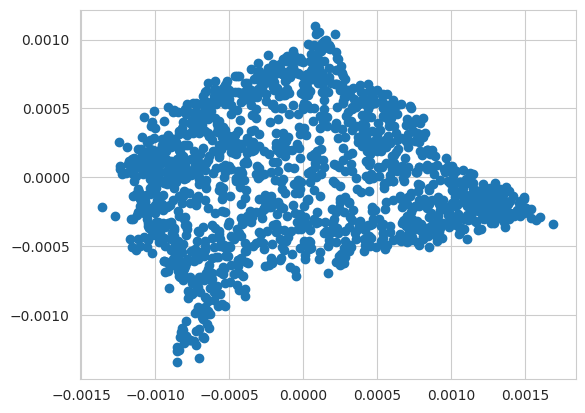

In [24]:
a, B = np.linalg.eig(M)
B_inv = np.linalg.inv(B)

def diff_map2(i, t):
    return B[i, 1:] * a[1:]**t

pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])

In [13]:
np.min(B @ np.diag(a) @ B_inv - M)

-4.141489668568754e-15

In [18]:
a[::-1]
w
':)'

array([-2.92586343e-03,  1.32571621e-04,  3.80516403e-03, ...,
        6.68927775e-01,  6.99564409e-01,  1.00000000e+00])

array([-0.27466137, -0.20270637, -0.19562168, ...,  0.66892777,
        0.69956441,  1.        ])

':)'

In [19]:
np.linalg.norm(B[:, 0])

1.0000000000000002

In [20]:
np.linalg.norm(Phi[:, 0])

0.10854919496771288

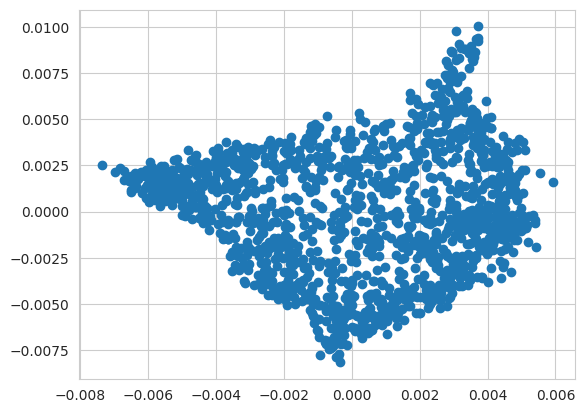

In [23]:
pts_diffmap = np.array([diff_map(i, 10) for i in range(n)])
plt.scatter(pts_diffmap[:, 0], pts_diffmap[:, 1])